# More Python, Data Structures, Stacks, Worksheet
* `pyplot`
* Sorting
* Generators
* API's
* ADT's and data structures
* Stacks

<font color=red>***But first, a little poetry...***

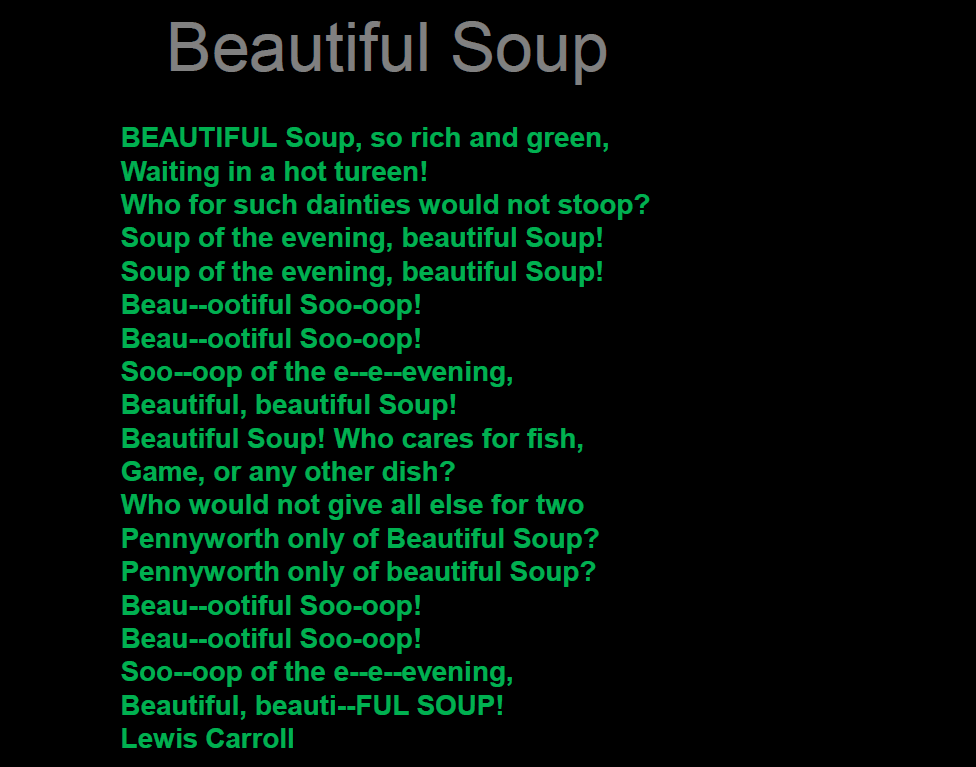

## `pyplot`

<font color=red>***Last time, we used `pandas` `plot` method, which is built on top of `pyplot`. But `pandas` has altered the interface a bit, so here we'll do some `pyplot` plotting.***

In [1]:
import matplotlib.pyplot as plt

<font color=red>***Let's make some data to plot:***

In [2]:
x = [2 * i for i in range(4)]
y = [i // 2 for i in x]
z = [i * i * j for i, j in zip(x, y)]
y2 = [j + 4 for j in y]
y3 = [j + 8 for j in y]
y4 = [j + 12 for j in y]
data = [y, y2, y3, y4]

In [3]:
data2 = [[j[i] for j in data] for i in range(len(data[0]))]

In [4]:
data

[[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15]]

In [5]:
data2

[[0, 4, 8, 12], [1, 5, 9, 13], [2, 6, 10, 14], [3, 7, 11, 15]]

In [6]:
x

[0, 2, 4, 6]

In [7]:
z

[0, 4, 32, 108]

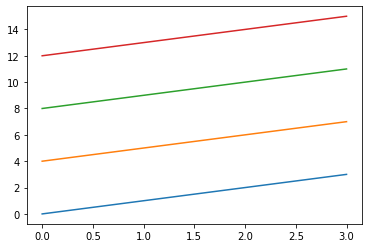

In [8]:
plt.plot(data2)

<font color=red>***Let's make a plot that has space for 4 rows and 1 column of subplots. If we have less than 10 subplots, we can use this convenience syntax:***

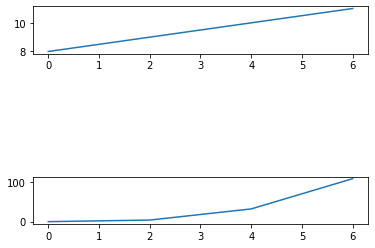

In [9]:
plt.subplot(414) # 4 rows, 1 column, 4th subplot (count
plt.plot(x, z)   # across the rows first)
plt.subplot(411) # 1st subplot
plt.plot(x, y3)

<font color=red>***If we have too many subplots for that syntax:***

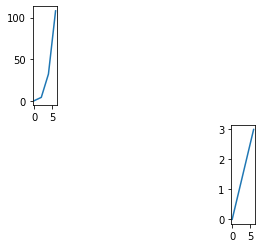

In [10]:
plt.subplot(2,12,20)
plt.plot(x, y)
plt.subplot(2,12,1)
plt.plot(x, z)

## Sorting

In [11]:
from operator import itemgetter

In [12]:
lol = [['Thompson', 'Violet'],
       ['Mangin', 'Lilly'],
       ['Thompson', 'Trixie'],
       ['Thompson', 'Lilly'],
       ['Mangin', 'Violet'],
       ['Thompson', 'Rocket'],
       ['Mangin', 'Lilly'],
       ['Mangin', 'Dash']]

In [13]:
for l in lol:
    print(l)

['Thompson', 'Violet']
['Mangin', 'Lilly']
['Thompson', 'Trixie']
['Thompson', 'Lilly']
['Mangin', 'Violet']
['Thompson', 'Rocket']
['Mangin', 'Lilly']
['Mangin', 'Dash']


<font color=red>***By default, Python sorts on the first column first, then the second, etc.***

In [14]:
slol = sorted(lol)
for l in slol:
    print(l)

['Mangin', 'Dash']
['Mangin', 'Lilly']
['Mangin', 'Lilly']
['Mangin', 'Violet']
['Thompson', 'Lilly']
['Thompson', 'Rocket']
['Thompson', 'Trixie']
['Thompson', 'Violet']


<font color=red>***But what if we wanted sorted on the column 1 first, then column 0?***

In [15]:
slol = sorted(lol, key=itemgetter(1, 0))
for l in slol:
    print(l)

['Mangin', 'Dash']
['Mangin', 'Lilly']
['Mangin', 'Lilly']
['Thompson', 'Lilly']
['Thompson', 'Rocket']
['Thompson', 'Trixie']
['Mangin', 'Violet']
['Thompson', 'Violet']


<font color=red>***Sort on column 1, move column 0 to keep pairs together, but don't worry about sorting column 0:*** 

In [16]:
slol = sorted(lol, key=itemgetter(1))
for l in slol:
    print(l)

['Mangin', 'Dash']
['Mangin', 'Lilly']
['Thompson', 'Lilly']
['Mangin', 'Lilly']
['Thompson', 'Rocket']
['Thompson', 'Trixie']
['Thompson', 'Violet']
['Mangin', 'Violet']


In [17]:
slol = sorted(lol, key=itemgetter(0))
for i in slol:
    print(i)

['Mangin', 'Lilly']
['Mangin', 'Violet']
['Mangin', 'Lilly']
['Mangin', 'Dash']
['Thompson', 'Violet']
['Thompson', 'Trixie']
['Thompson', 'Lilly']
['Thompson', 'Rocket']


<font color=red>***Before `itemgetter`, we had to use lambdas to do this kind of thing:***

In [18]:
slol = sorted(lol, key=lambda x: (x[1], x[0]))
for l in slol:
    print(l)

['Mangin', 'Dash']
['Mangin', 'Lilly']
['Mangin', 'Lilly']
['Thompson', 'Lilly']
['Thompson', 'Rocket']
['Thompson', 'Trixie']
['Mangin', 'Violet']
['Thompson', 'Violet']


## Generators

<font color=red>***The generators that we have the most experience with are the return values of the `range` function. We can make our own. The easiest way is to use `yield`:***

In [19]:
def dog_generator():
    yield 'Trixie'
    yield 'Molly'
    yield 'Lilly'
    yield 'Violet'
    yield 'Rocket'

In [20]:
for dog in dog_generator():
    print(dog)

Trixie
Molly
Lilly
Violet
Rocket


In [21]:
list(dog_generator())


['Trixie', 'Molly', 'Lilly', 'Violet', 'Rocket']

In [22]:
[dog for dog in dog_generator()]

['Trixie', 'Molly', 'Lilly', 'Violet', 'Rocket']

<font color=red>***Let's make a `dog_generator` and store it in a variable:***

In [23]:
dg = dog_generator()

<font color=red>***Now we can grab dogs one-at-time using the built-in `next` function:***

In [24]:
next(dg)

'Trixie'

In [25]:
next(dg)

'Molly'

In [26]:
next(dg)

'Lilly'

In [27]:
def infinite_generator():
    i = 0
    while True:
        yield i
        i += 1

In [28]:
ig = infinite_generator()

In [29]:
next(ig)

0

In [30]:
next(ig)

1

In [31]:
next(ig)

2

In [32]:
next(dg)
next(dg)
next(dg)
next(dg)

StopIteration: 

## Data structures

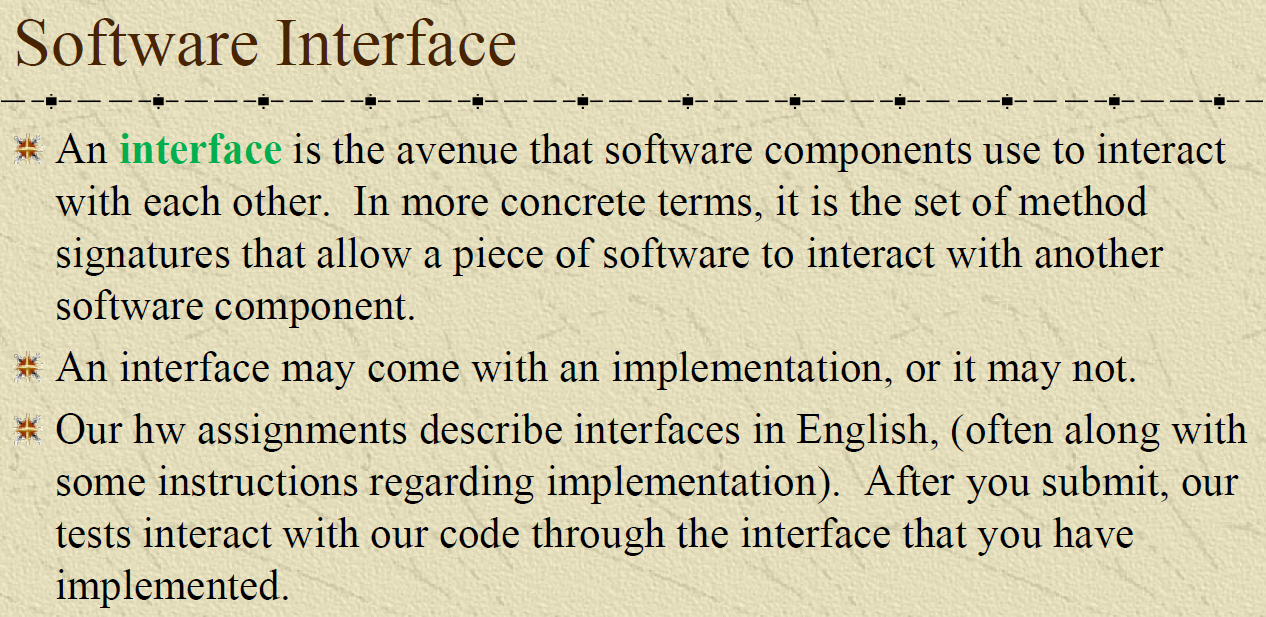

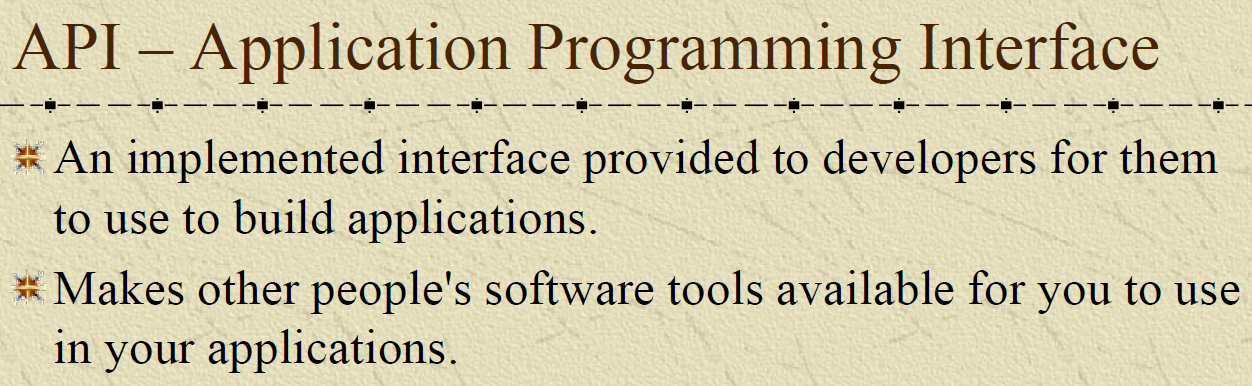

https://docs.python.org/3.8/library/turtle.html

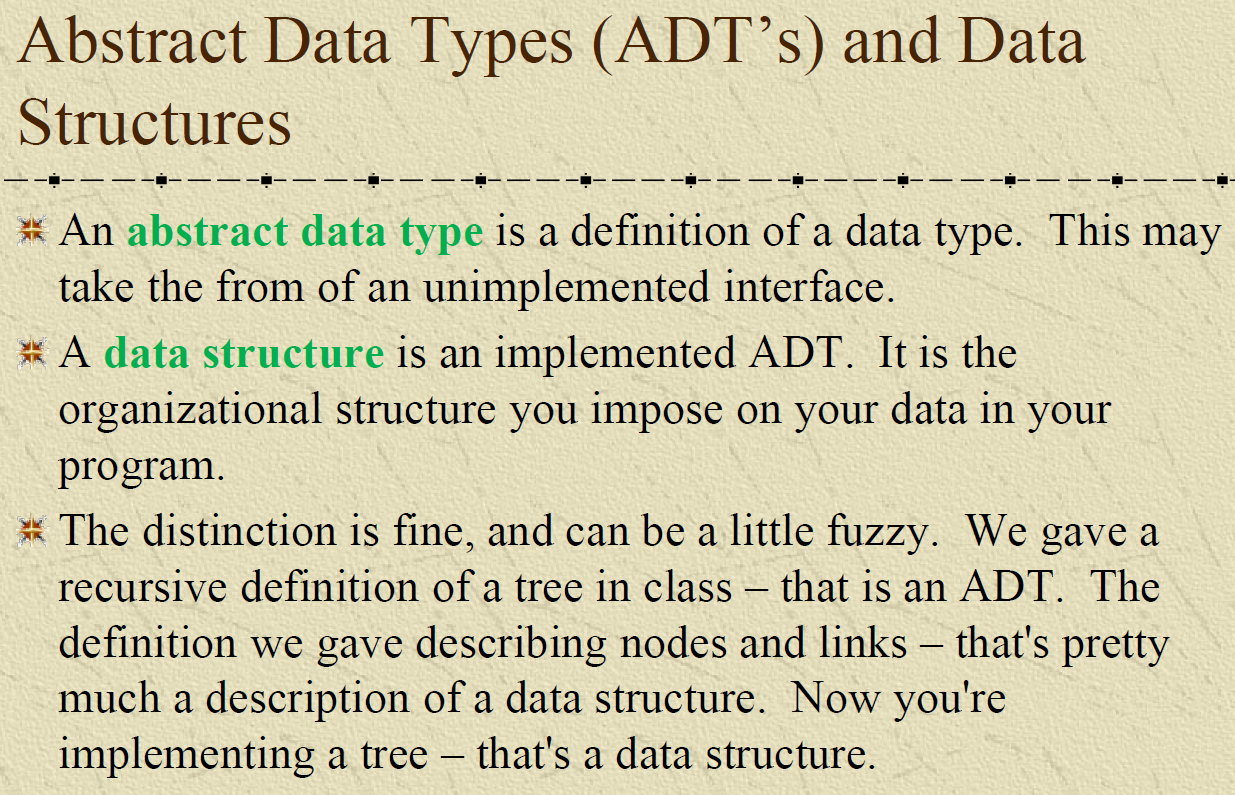

<font color=red>***If you want to waste time, stare at these and ask yourself, "Are these ADT's? Interfaces? Data structures? Both interfaces and ADT's, along with data structures?":***<br> https://docs.python.org/3/library/stdtypes.html#sequence-types-list-tuple-range

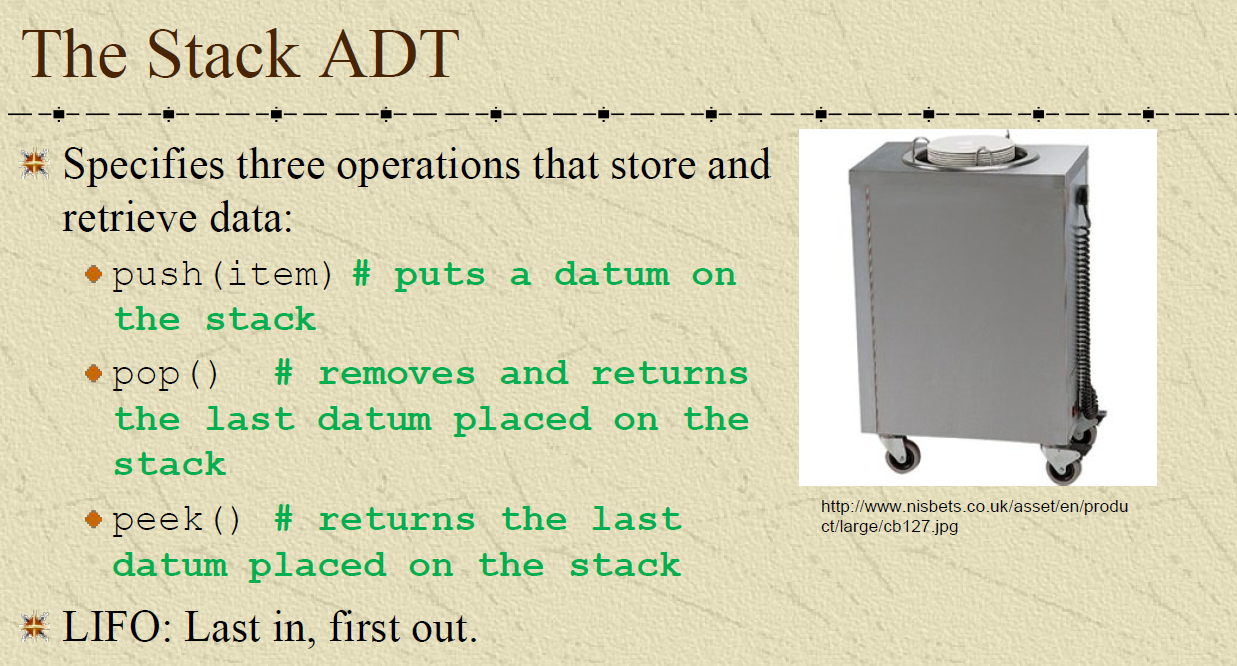

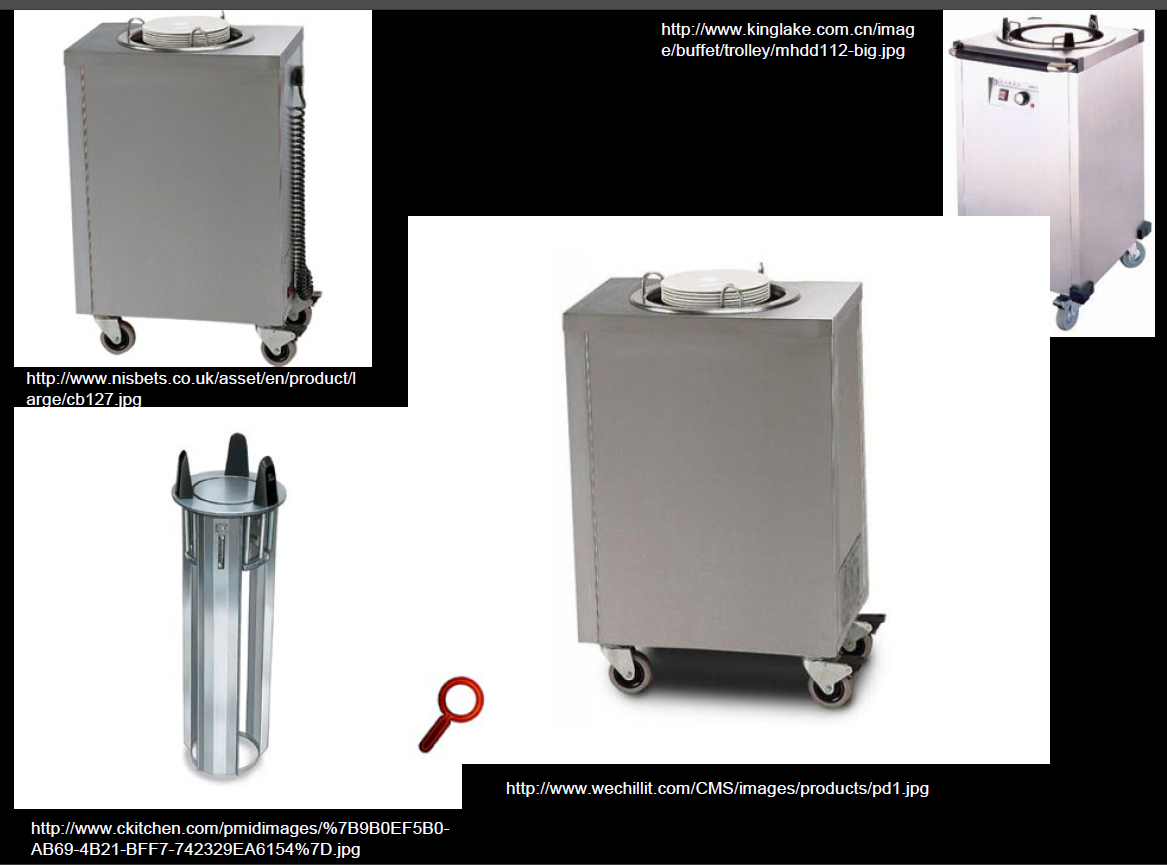

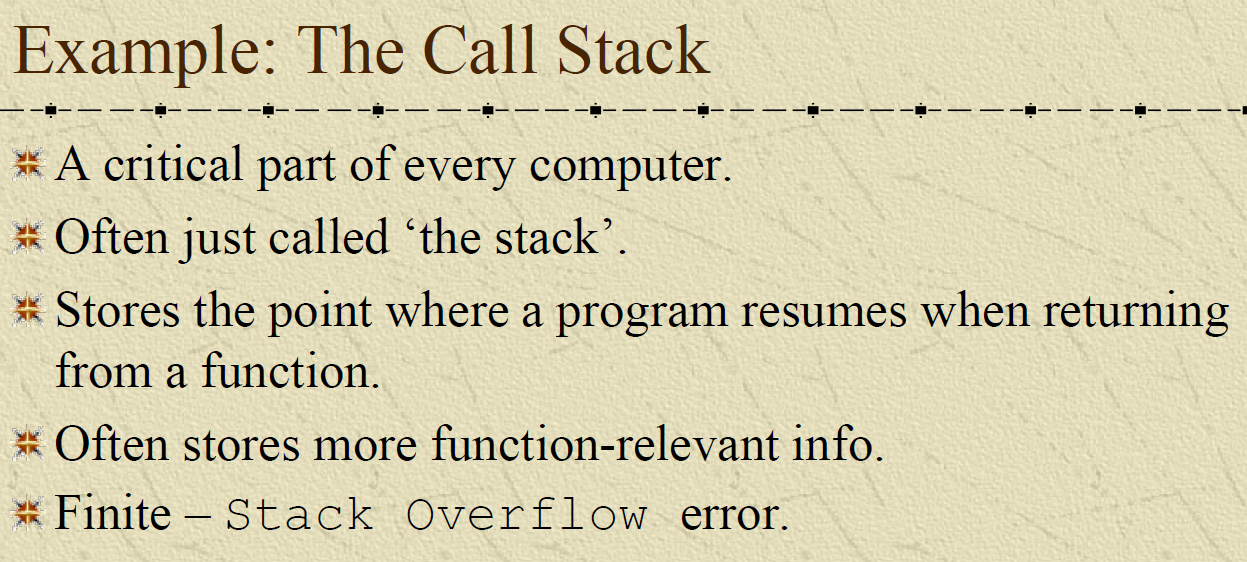

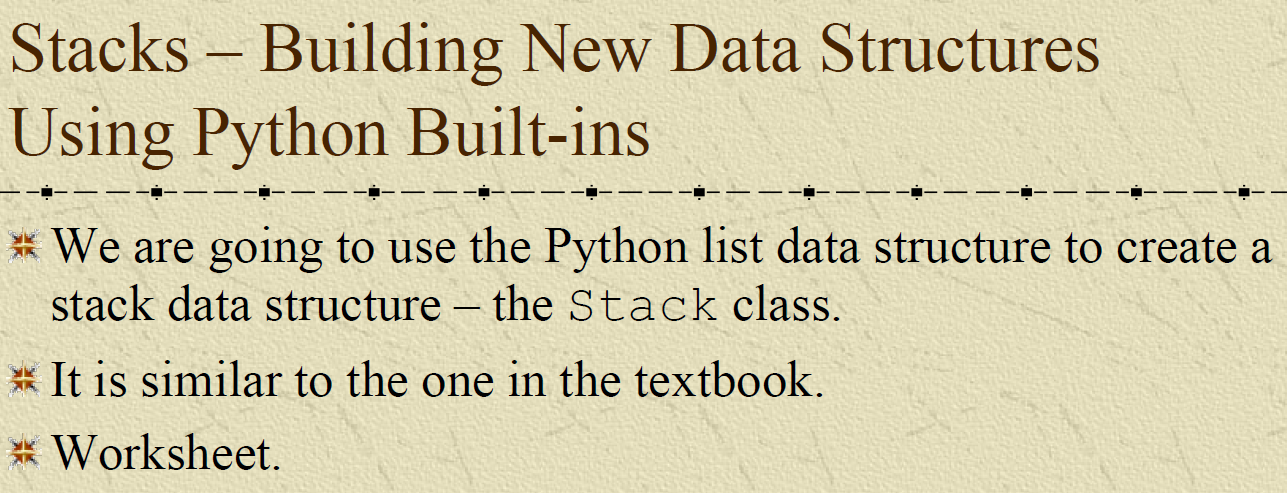

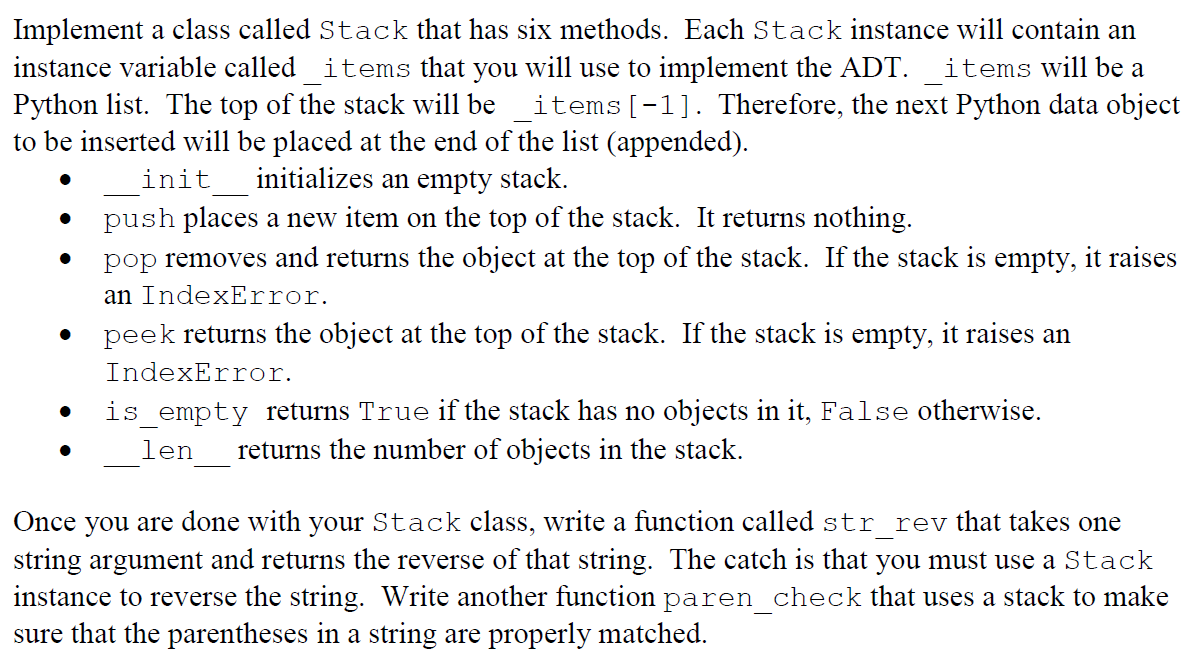

In [1]:
class Stack:
    def __init__(self):
        self._items = []
        
    def push(self, item):
        self._items.append(item)
        
    def pop(self):
        if not self._items:
            raise IndexError('pop from empty stack')
        return self._items.pop()
    
    def peek(self):
        if not self._items:
            raise IndexError('peek from empty stack')
        return self._items[-1]
    
    def is_empty(self):
        return not self._items
    
    def __len__(self):
        return len(self._items)

In [2]:
def str_rev(string):
    s = Stack()
    for ch in string:
        s.push(ch)
    rev = ''
    while not s.is_empty():
        rev += s.pop()
    return rev

In [3]:
str_rev('I love my doggie')

'eiggod ym evol I'

In [ ]:
def paren_check(string):
    s = Stack()
    for ch in string:
        if ch == '(':
            s.push(ch)
        elif ch == ')':
            if s.is_empty():
                return False
            else:
                s.pop()
    return s.is_empty()